<a href="https://colab.research.google.com/github/Soob00/20251R0136COSE47101/blob/dataset1_decisionTree/notebooks/dataset1_clustered_decisiontrees_all_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

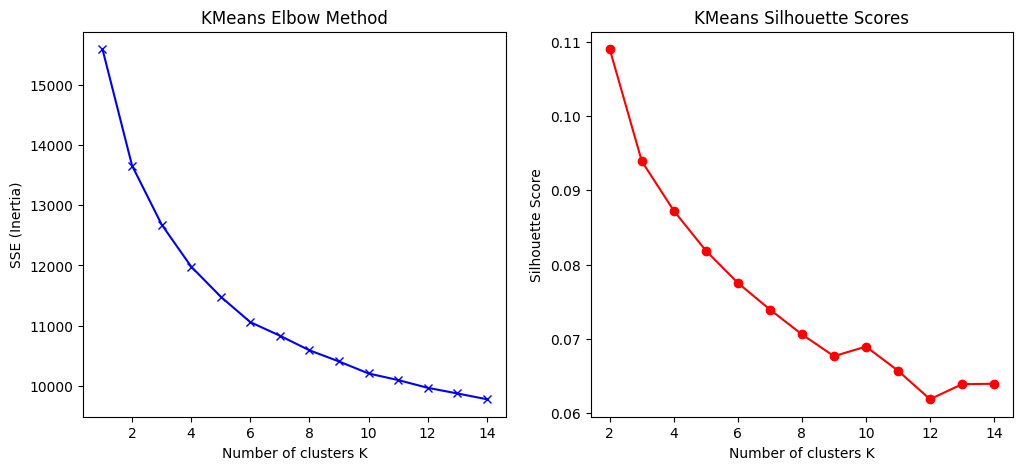

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import pandas as pd
df = pd.read_csv("/content/processed_all_dataset2.csv")
X = df
# Ïä§Ìä∏Î†àÏä§Î†àÎ≤® Í∞íÏùÑ 0,1,2Î°ú Î≥ÄÍ≤Ω (1,2,3 ‚Üí 0,1,2)
df['Stress Level'] = df['Stress Level'] - 1



# -------------------------
# 2. KMeans ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
# -------------------------

sse = []
sil_scores = []
K_range = range(1, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    if k > 1:
        labels = kmeans.labels_
        sil_scores.append(silhouette_score(X, labels))
    else:
        sil_scores.append(np.nan)  # k=1ÏùÄ Ïã§Î£®Ïó£ Ï†êÏàò Í≥ÑÏÇ∞ Î∂àÍ∞Ä

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, sse, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('SSE (Inertia)')
plt.title('KMeans Elbow Method')

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, 'ro-')
plt.xlabel('Number of clusters K')
plt.ylabel('Silhouette Score')
plt.title('KMeans Silhouette Scores')
plt.show()



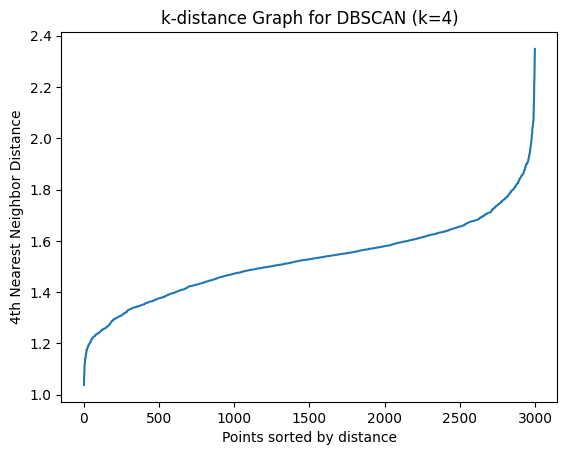

DBSCAN clusters found: 0


In [59]:
# -------------------------
# 3. DBSCAN ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
# -------------------------

# eps Í≤∞Ï†ï ÏúÑÌï¥ k-distance Í∑∏ÎûòÌîÑ (min_samples=4 Í∏∞Ï§Ä)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, 3])  # 4Î≤àÏß∏ Ïù¥ÏõÉ Í±∞Î¶¨
plt.plot(distances)
plt.title("k-distance Graph for DBSCAN (k=4)")
plt.xlabel("Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()

# Ïó¨Í∏∞ÏÑú Ï†ÅÎãπÌïú eps Î≤îÏúÑ ÌôïÏù∏ ÌõÑ ÏòàÏãúÎ°ú eps=0.5 ÏÑ§Ï†ï
dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(X)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò (ÎÖ∏Ïù¥Ï¶à Ï†úÏô∏)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"DBSCAN clusters found: {n_clusters_dbscan}")


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

'''
k=6
'''
# 1. KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉòÌîå Ïàò
print("KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉòÌîå Ïàò:")
print(pd.Series(kmeans_labels).value_counts().sort_index())

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî ÌäπÏßï (ÌèâÍ∑†, Î∂ÑÏÇ∞)
kmeans_df = pd.DataFrame(X)
kmeans_df['cluster'] = kmeans_labels
print("KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Î∞è Î∂ÑÏÇ∞:")
print(kmeans_df.groupby('cluster').agg(['mean', 'var']))

KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉòÌîå Ïàò:
0    497
1    442
2    527
3    573
4    473
5    488
Name: count, dtype: int64
KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Î∞è Î∂ÑÏÇ∞:
              Age           Exercise Level           Sleep Hours            \
             mean       var           mean       var        mean       var   
cluster                                                                      
0        0.511723  0.089079       2.997988  0.002012    0.321291  0.393295   
1        0.517313  0.083570       2.110860  0.511492   -1.366357  0.304645   
2        0.504249  0.076154       1.747628  0.474210    1.267096  0.314195   
3        0.491843  0.085656       1.167539  0.139714   -0.354843  0.334787   
4        0.495496  0.087605       2.545455  0.248459   -0.381516  0.456386   
5        0.512429  0.090087       1.473361  0.249802    0.328424  0.374049   

        Stress Level           Work Hours per Week            ...  \
                mean       var                mean       var  ...   
cl

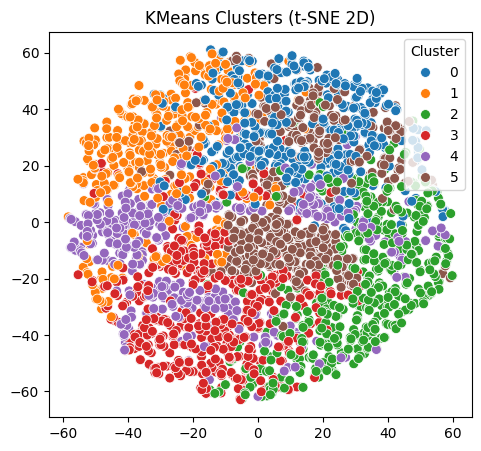

In [61]:
# 4. ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏãúÍ∞ÅÌôî (t-SNE)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette='tab10', s=50)
plt.title('KMeans Clusters (t-SNE 2D)')
plt.legend(title='Cluster')


plt.show()


In [62]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering(X, labels, method_name=""):
    """
    ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥ºÏóê ÎåÄÌïú ÎÇ¥Î∂Ä ÌèâÍ∞Ä ÏßÄÌëúÎ•º Í≥ÑÏÇ∞ÌïòÍ≥† ÎîïÏÖîÎÑàÎ¶¨Î°ú Î∞òÌôòÌï©ÎãàÎã§.

    Parameters:
        X (ndarray): ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÎåÄÏÉÅ Îç∞Ïù¥ÌÑ∞ (scalingÎêú Í≤É)
        labels (ndarray): ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÎùºÎ≤®
        method_name (str): Î∞©Î≤ï Ïù¥Î¶Ñ (Ïòà: "KMeans", "GMM", "DBSCAN")

    Returns:
        dict: method Ïù¥Î¶ÑÍ≥º ÎÇ¥Î∂Ä ÌèâÍ∞Ä ÏßÄÌëúÎì§ (Silhouette, Calinski, Davies)
    """
    # Ïú†Ìö®Ìïú ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò ÌôïÏù∏
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters <= 1:
        # ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä 1Í∞ú Ïù¥ÌïòÏù¥Î©¥ ÌèâÍ∞ÄÌï† Ïàò ÏóÜÏùå
        return {
            "method": method_name,
            "n_clusters": n_clusters,
            "silhouette": None,
            "calinski": None,
            "davies": None
        }

    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies = davies_bouldin_score(X, labels)

    return {
        "method": method_name,
        "n_clusters": n_clusters,
        "silhouette": silhouette,
        "calinski": calinski,
        "davies": davies
    }


In [63]:
results = []

# KMeans
results.append(evaluate_clustering(X, kmeans_labels, method_name="KMeans"))


# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ¶¨
import pandas as pd
results_df = pd.DataFrame(results)
results_df = results_df[["method", "n_clusters", "silhouette", "calinski", "davies"]]
results_df


method  n_clusters  silhouette    calinski    davies
0  KMeans           6     0.07752  245.741253  2.383068

<ipython-input-64-521487c4874b>:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


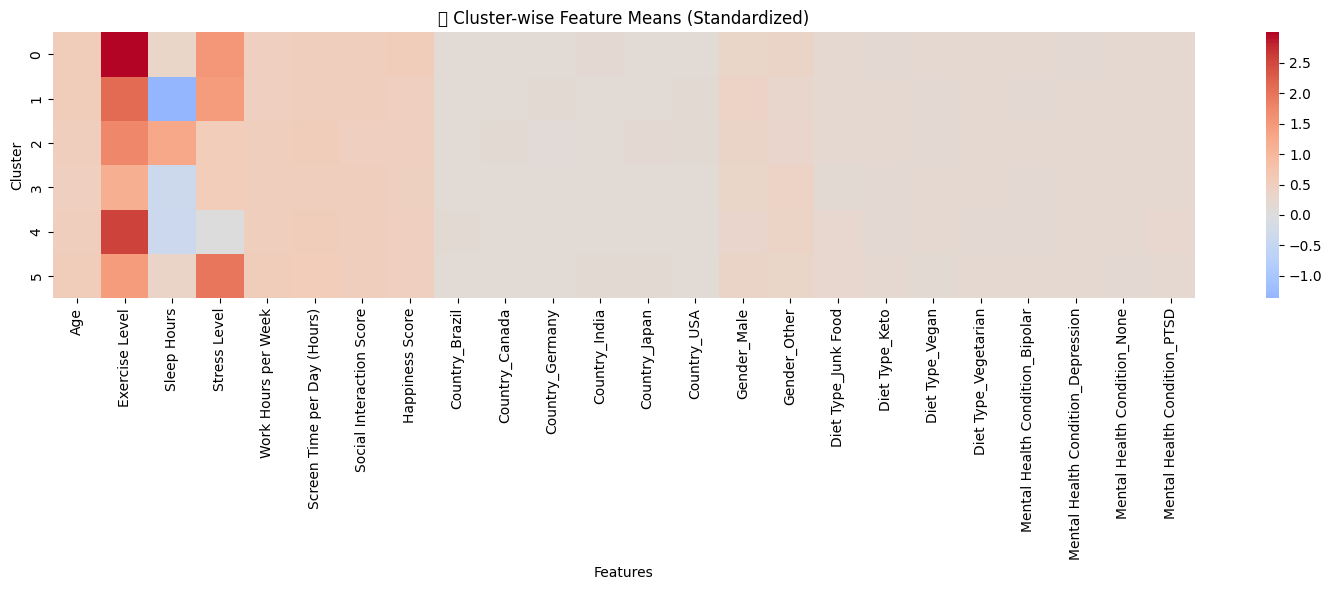

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≤àÌò∏Í∞Ä Îã¥Í∏¥ Series ÎòêÎäî Î∞∞Ïó¥ÏùÑ Í∞ÄÏßÑ ÏÉÅÌÉúÎùºÍ≥† Í∞ÄÏ†ï (Ïòà: kmeans_labels)
# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
# feature_namesÎ•º Ï†ïÏùò (XÍ∞Ä ÏõêÎûò DataFrameÏùº Í≤ΩÏö∞)
feature_names = X.columns

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º Ìè¨Ìï®Ìïú ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÎßåÎì§Í∏∞
clustered_df = pd.DataFrame(X, columns=feature_names)
clustered_df["cluster"] = kmeans_labels
clustered_df = pd.DataFrame(X, columns=feature_names)  # feature_namesÎäî ÌîºÏ≤ò Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏
clustered_df["cluster"] = kmeans_labels  # KMeans Íµ∞Ïßë Í≤∞Í≥º

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†Í∞í ÌôïÏù∏
cluster_means = clustered_df.groupby("cluster").mean()

# ÌûàÌä∏ÎßµÏúºÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 6))
sns.heatmap(cluster_means, cmap="coolwarm", center=0, annot=False)
plt.title("üìä Cluster-wise Feature Means (Standardized)")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


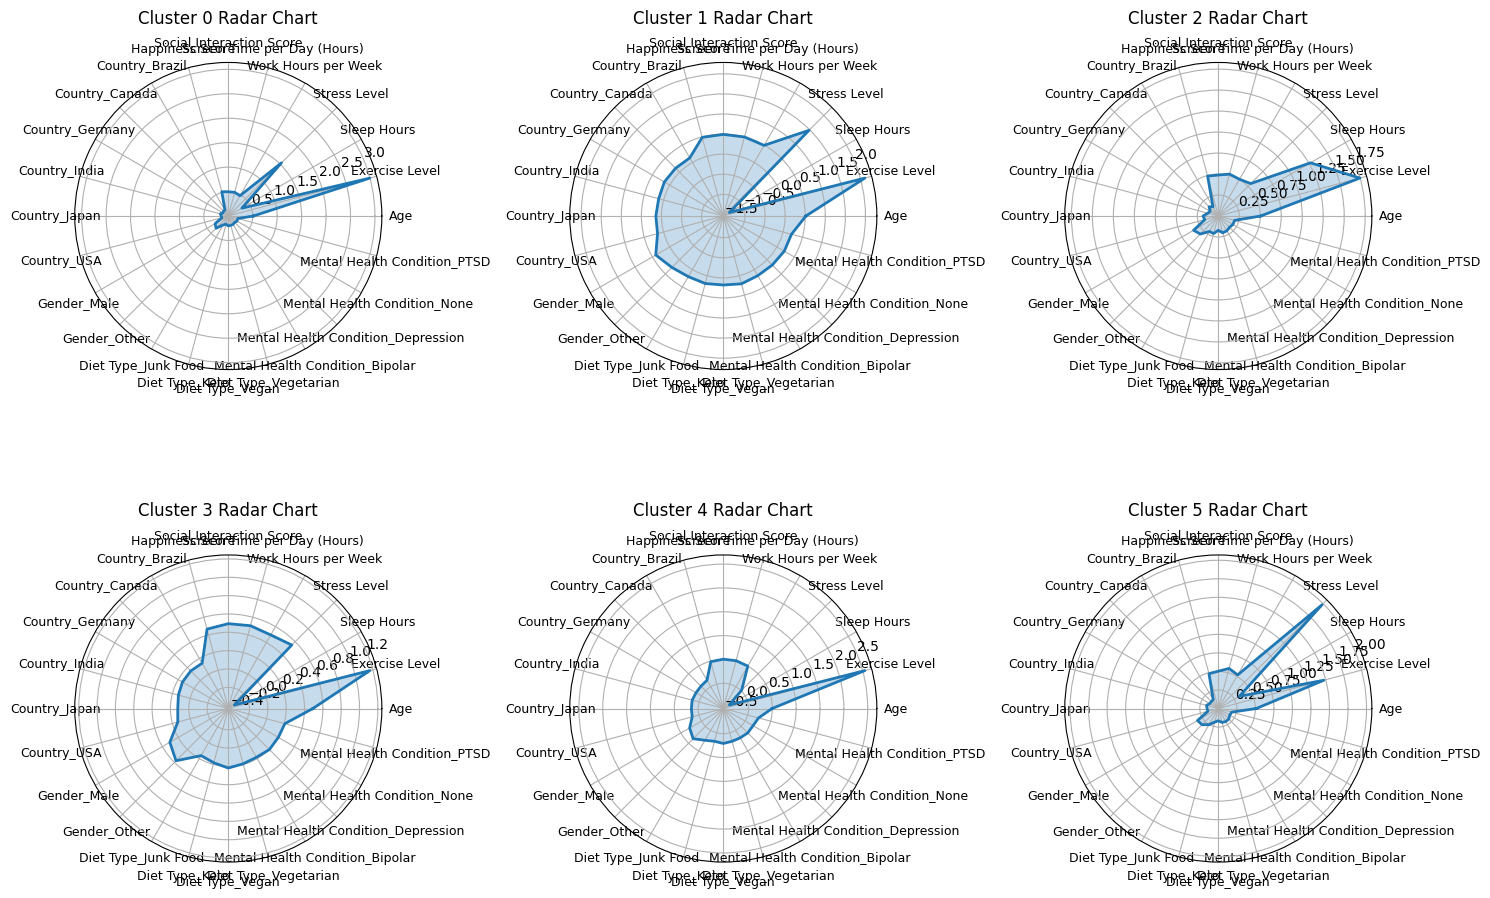

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
cluster_means = clustered_df.groupby("cluster").mean()

labels = cluster_means.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += [angles[0]]  # Îã´Í∏∞ ÏúÑÌï¥ Ï≤òÏùå Í∞ÅÎèÑ Ï∂îÍ∞Ä

num_clusters = len(cluster_means)
cols = 3  # Ìïú ÌñâÏóê 3Í∞úÏî© Î∞∞Ïπò (ÏõêÌïòÎäî ÏàòÎ°ú Î≥ÄÍ≤Ω Í∞ÄÎä•)
rows = (num_clusters + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), subplot_kw=dict(polar=True))
axs = axs.flatten()  # 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú ÎßåÎì§Ïñ¥ÏÑú Ïù∏Îç±Ïã± Ìé∏ÌïòÍ≤å

for i, (cluster_id, row) in enumerate(cluster_means.iterrows()):
    values = row.values
    values = np.concatenate((values, [values[0]]))  # Îã´Í∏∞ ÏúÑÌï¥ Ï≤òÏùåÍ∞í Ï∂îÍ∞Ä

    ax = axs[i]
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(f"Cluster {cluster_id} Radar Chart", y=1.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)

# ÎÇ®ÏùÄ subplotÏùÄ ÏÇ≠Ï†ú (ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÎ≥¥Îã§ ÎßéÏùÑ Í≤ΩÏö∞)
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [66]:
for cluster_id, data in clustered_df.groupby("cluster"):
    print(f"\nCluster {cluster_id} Summary:")
    print(data.describe().round(3))



Cluster 0 Summary:
           Age  Exercise Level  Sleep Hours  Stress Level  \
count  497.000         497.000      497.000       497.000   
mean     0.512           2.998        0.321         1.537   
std      0.298           0.045        0.627         0.499   
min      0.000           2.000       -0.784         1.000   
25%      0.261           3.000       -0.184         1.000   
50%      0.500           3.000        0.283         2.000   
75%      0.783           3.000        0.683         2.000   
max      1.000           3.000        2.617         2.000   

       Work Hours per Week  Screen Time per Day (Hours)  \
count              497.000                      497.000   
mean                 0.480                        0.502   
std                  0.302                        0.285   
min                  0.000                        0.000   
25%                  0.231                        0.283   
50%                  0.436                        0.483   
75%              

ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ìï¥ÏÑù Î∞è ÏãúÏÇ¨Ï†ê
Cluster 0
Ïö¥ÎèôÎüâÏù¥ Í∞ÄÏû• ÎßéÏùå(2.99), ÌñâÎ≥µÏ†êÏàòÎèÑ Í∞ÄÏû• ÎÜíÏùå(0.51).
Í∑∏Îü¨ÎÇò Ïä§Ìä∏Î†àÏä§Í∞Ä Îß§Ïö∞ ÎÜíÏùå(2.54).
ÏãúÏÇ¨Ï†ê: Ïö¥ÎèôÏù¥ ÎßéÏïÑÎèÑ Ïä§Ìä∏Î†àÏä§Í∞Ä ÎÜíÏùÑ Ïàò ÏûàÏùå. Ïö¥Îèô Ïô∏Ïóê Ïä§Ìä∏Î†àÏä§ ÏöîÏù∏Ïù¥ ÎßéÍ±∞ÎÇò, Ïö¥ÎèôÏù¥ Ïä§Ìä∏Î†àÏä§ Ìï¥ÏÜåÏóê Ï∂©Î∂ÑÌûà Í∏∞Ïó¨ÌïòÏßÄ Î™ªÌïòÎäî ÏßëÎã®Ïùº Ïàò ÏûàÏùå.

Cluster 1
ÏàòÎ©¥Ïù¥ Í∑πÎã®Ï†ÅÏúºÎ°ú Î∂ÄÏ°±(-1.37), Ïä§Ìä∏Î†àÏä§ ÎÜíÏùå(2.48), Ïö¥ÎèôÏùÄ Ï§ëÍ∞Ñ(2.11).
ÌñâÎ≥µÏ†êÏàòÎäî ÌèâÍ∑† Ïù¥Ìïò(0.49).
ÏãúÏÇ¨Ï†ê: ÏàòÎ©¥ Î∂ÄÏ°±Ïù¥ Ïä§Ìä∏Î†àÏä§ÏôÄ ÌñâÎ≥µ Î™®ÎëêÏóê Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Ï†ÑÌòïÏ†ÅÏù∏ ÏßëÎã®.

Cluster 2
ÏàòÎ©¥Ïù¥ Í∞ÄÏû• Ï∂©Î∂Ñ(1.27), Ïä§Ìä∏Î†àÏä§ ÎÇÆÏùå(1.55), Ïö¥Îèô Ï†ÅÏùå(1.75).
ÌñâÎ≥µÏ†êÏàòÎäî ÌèâÍ∑†(0.49).
ÏãúÏÇ¨Ï†ê: Ïö¥ÎèôÏùÄ Ï†ÅÏßÄÎßå ÏàòÎ©¥Ïù¥ Ï∂©Î∂ÑÌï¥ Ïä§Ìä∏Î†àÏä§Í∞Ä ÎÇÆÍ≤å Ïú†ÏßÄÎêòÎäî ÏßëÎã®.

Cluster 3
Ïö¥ÎèôÍ≥º ÏàòÎ©¥ Î™®Îëê Î∂ÄÏ°±(1.17, -0.35), Ïä§Ìä∏Î†àÏä§ ÎÇÆÏùå(1.55), ÌñâÎ≥µÏ†êÏàò ÏµúÏ†Ä(0.47).
ÏãúÏÇ¨Ï†ê: Ïö¥Îèô¬∑ÏàòÎ©¥ Î™®Îëê Î∂ÄÏ°±ÌïòÎ©¥ ÌñâÎ≥µÍ∞êÏù¥ Í∞ÄÏû• ÎÇÆÏïÑÏßà Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨.

Cluster 4
Ïö¥Îèô ÎßéÏùå(2.55), Ïä§Ìä∏Î†àÏä§ Í∞ÄÏû• ÎÇÆÏùå(1.02).
ÏàòÎ©¥ÏùÄ Îã§ÏÜå Î∂ÄÏ°±(-0.38), ÌñâÎ≥µÏ†êÏàòÎäî ÌèâÍ∑†(0.49).
ÏãúÏÇ¨Ï†ê: Ïö¥ÎèôÏù¥ Ïä§Ìä∏Î†àÏä§ ÏôÑÌôîÏóê Ìö®Í≥ºÏ†ÅÏûÑÏùÑ Î≥¥Ïó¨Ï£ºÎäî ÏßëÎã®.

Cluster 5
Ïö¥Îèô Ï†ÅÏùå(1.47), Ïä§Ìä∏Î†àÏä§ ÏµúÍ≥†(2.98).
ÏàòÎ©¥ÏùÄ ÌèâÍ∑†(0.33), ÌñâÎ≥µÏ†êÏàòÎäî ÌèâÍ∑†(0.49).
ÏãúÏÇ¨Ï†ê: Ïö¥Îèô Î∂ÄÏ°±Ïù¥ Ïä§Ìä∏Î†àÏä§ÏôÄ Ïó∞Í¥ÄÎê† Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨.

Í∏∞ÌÉÄ Î≥ÄÏàò(ÏÑ±Î≥Ñ, ÏãùÎã®, Ï†ïÏã†Í±¥Í∞ï ÏÉÅÌÉú Îì±)
ÏÑ±Î≥Ñ, ÏãùÎã®, Ï†ïÏã†Í±¥Í∞ï Î≥ÄÏàòÎäî ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÏñ¥ Î≥¥ÏûÖÎãàÎã§(ÎåÄÎ∂ÄÎ∂Ñ 0.17~0.25 ÏàòÏ§Ä).
ÌäπÏ†ï ÏãùÎã®(Ïòà: Junk Food, Vegetarian Îì±)Ïù¥ÎÇò Ï†ïÏã†Í±¥Í∞ï ÏÉÅÌÉúÍ∞Ä ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú ÎöúÎ†∑ÌïòÍ≤å Íµ¨Î∂ÑÎêòÏßÄÎäî ÏïäÏùå.

Ï†ÑÏ≤¥ Ìå®ÌÑ¥ Î∞è ÏãúÏÇ¨Ï†ê
Ïö¥ÎèôÍ≥º Ïä§Ìä∏Î†àÏä§: Ïö¥ÎèôÎüâÏù¥ ÎßéÏúºÎ©¥ÏÑú Ïä§Ìä∏Î†àÏä§Í∞Ä ÎÇÆÏùÄ ÏßëÎã®(Cluster 4)Ïù¥ Ï°¥Ïû¨ÌïòÏßÄÎßå, Ïö¥ÎèôÏù¥ ÎßéÏïÑÎèÑ Ïä§Ìä∏Î†àÏä§Í∞Ä ÎÜíÏùÄ ÏßëÎã®(Cluster 0)ÎèÑ ÏûàÏùå. Ï¶â, Ïö¥ÎèôÎßåÏúºÎ°ú Ïä§Ìä∏Î†àÏä§Í∞Ä Ìï≠ÏÉÅ ÎÇÆÏïÑÏßÄÎäî Í≤ÉÏùÄ ÏïÑÎãò.

ÏàòÎ©¥Í≥º Ïä§Ìä∏Î†àÏä§: ÏàòÎ©¥Ïù¥ Ï∂©Î∂ÑÌïú ÏßëÎã®(Cluster 2)ÏóêÏÑú Ïä§Ìä∏Î†àÏä§Í∞Ä ÎÇÆÏùå. ÏàòÎ©¥Ïù¥ Î∂ÄÏ°±Ìïú ÏßëÎã®(Cluster 1)ÏóêÏÑú Ïä§Ìä∏Î†àÏä§Í∞Ä ÎÜíÏùå.

ÌñâÎ≥µÏ†êÏàò: ÎåÄÎ∂ÄÎ∂ÑÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ÏóêÏÑú 0.48~0.51Î°ú ÌÅ∞ Ï∞®Ïù¥Îäî ÏóÜÏúºÎÇò, Ïö¥Îèô¬∑ÏàòÎ©¥ Î™®Îëê Î∂ÄÏ°±Ìïú ÏßëÎã®(Cluster 3)ÏóêÏÑú Í∞ÄÏû• ÎÇÆÏùå.

Ï†ïÏã†Í±¥Í∞ï Î≥ÄÏàò: ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÏñ¥, ÌÅ¥Îü¨Ïä§ÌÑ∞ Íµ¨Î∂ÑÏóê Í≤∞Ï†ïÏ†Å Ïó≠Ìï†ÏùÑ ÌïòÏßÑ ÏïäÏùå.

Í≤∞Î°†
Ïö¥ÎèôÍ≥º ÏàòÎ©¥ÏùÄ Ïä§Ìä∏Î†àÏä§ÏôÄ Î∞ÄÏ†ëÌïú Í¥ÄÎ†®Ïù¥ ÏûàÏùå.

Ïö¥ÎèôÏù¥ ÎßéÍ≥† Ïä§Ìä∏Î†àÏä§Í∞Ä ÎÇÆÏùÄ ÏßëÎã®(Cluster 4), ÏàòÎ©¥Ïù¥ Ï∂©Î∂ÑÌïòÍ≥† Ïä§Ìä∏Î†àÏä§Í∞Ä ÎÇÆÏùÄ ÏßëÎã®(Cluster 2)Ïù¥ Ï°¥Ïû¨.

ÌñâÎ≥µÏ†êÏàòÎäî Ïö¥ÎèôÍ≥º ÏàòÎ©¥Ïù¥ Î™®Îëê Î∂ÄÏ°±Ìïú ÏßëÎã®(Cluster 3)ÏóêÏÑú Í∞ÄÏû• ÎÇÆÏùå.

Ï†ïÏã†Í±¥Í∞ï, ÏãùÎã® Îì±ÏùÄ ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÏùå.

ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÌÜµÌï¥ Í±¥Í∞ïÌñâÎèô(Ïö¥Îèô, ÏàòÎ©¥)Í≥º Ïä§Ìä∏Î†àÏä§, ÌñâÎ≥µÏùò Í¥ÄÍ≥ÑÎ•º ÏûÖÏ≤¥Ï†ÅÏúºÎ°ú ÌååÏïÖÌï† Ïàò ÏûàÏùå



In [67]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report



features = clustered_df.columns.drop(['Stress Level', 'cluster'])

models_by_cluster = {}

for cluster_id in sorted(clustered_df['cluster'].unique()):
    cluster_data = clustered_df[clustered_df['cluster'] == cluster_id]
    X_cluster = cluster_data[features]
    y_cluster = cluster_data['Stress Level']

    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    param_grid = {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }

    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f"\n[Cluster {cluster_id}] Best Params: {grid_search.best_params_}")
    print(classification_report(y_test, y_pred))

    models_by_cluster[cluster_id] = best_model



[Cluster 0] Best Params: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 5}
              precision    recall  f1-score   support

           1       0.32      0.27      0.29        45
           2       0.47      0.53      0.50        55

    accuracy                           0.41       100
   macro avg       0.39      0.40      0.39       100
weighted avg       0.40      0.41      0.40       100


[Cluster 1] Best Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.47      0.55      0.51        38
           2       0.55      0.52      0.53        46

    accuracy                           0.51        89
   macro avg       0.34      0.36      0.35        89
weighted avg       0.48      0.51      0.49        89



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



[Cluster 2] Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.58      0.55      0.56        55
           1       0.51      0.60      0.55        43
           2       0.67      0.25      0.36         8

    accuracy                           0.55       106
   macro avg       0.58      0.47      0.49       106
weighted avg       0.56      0.55      0.54       106


[Cluster 3] Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.49      0.77      0.60        44
           1       0.78      0.51      0.62        71

    accuracy                           0.61       115
   macro avg       0.64      0.64      0.61       115
weighted avg       0.67      0.61      0.61       115


[Cluster 4] Best Params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10}
              prec

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



[Cluster 5] Best Params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 10}
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.99      1.00      0.99        97

    accuracy                           0.99        98
   macro avg       0.49      0.50      0.50        98
weighted avg       0.98      0.99      0.98        98



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = clustered_df.columns.drop(['Happiness Score', 'cluster'])

models_by_cluster = {}

for cluster_id in sorted(clustered_df['cluster'].unique()):
    cluster_data = clustered_df[clustered_df['cluster'] == cluster_id]
    X_cluster = cluster_data[features]
    y_cluster = cluster_data['Happiness Score']

    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    param_grid = {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f"\n[Cluster {cluster_id}] Best Params: {grid_search.best_params_}")
    print(f"R¬≤ Score: {r2_score(y_test, y_pred):.3f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")

    models_by_cluster[cluster_id] = best_model


[Cluster 0] Best Params: {'max_depth': 3, 'min_samples_split': 10}
R¬≤ Score: -0.087
Mean Squared Error: 0.100

[Cluster 1] Best Params: {'max_depth': 3, 'min_samples_split': 10}
R¬≤ Score: -0.267
Mean Squared Error: 0.106

[Cluster 2] Best Params: {'max_depth': 3, 'min_samples_split': 10}
R¬≤ Score: 0.026
Mean Squared Error: 0.071

[Cluster 3] Best Params: {'max_depth': 3, 'min_samples_split': 10}
R¬≤ Score: -0.084
Mean Squared Error: 0.091

[Cluster 4] Best Params: {'max_depth': 3, 'min_samples_split': 2}
R¬≤ Score: -0.154
Mean Squared Error: 0.089

[Cluster 5] Best Params: {'max_depth': 3, 'min_samples_split': 10}
R¬≤ Score: -0.232
Mean Squared Error: 0.089
